In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sys
sys.path.append('..')
import src.tools as tools

In [2]:
#RFM Libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import kruskal

#CLTV Libraries:
from datetime import datetime, timedelta,date
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

In [3]:
a = pd.read_csv('../data/Year 2009-2010.csv', encoding='unicode_escape')
b = pd.read_csv('../data/Year 2010-2011.csv', encoding='unicode_escape')
retail = pd.concat([a,b], ignore_index=True)
retail.columns= retail.columns.str.lower()

In [4]:
retail = retail.query("country=='United Kingdom'").reset_index(drop=True)
retail.invoicedate = pd.to_datetime(retail.invoicedate)
retail['year'] = retail.invoicedate.dt.year
retail['month'] = retail.invoicedate.dt.month
retail['week'] = retail.invoicedate.dt.isocalendar().week
retail['day'] = retail.invoicedate.dt.day
retail['hour'] = retail.invoicedate.dt.hour
retail['revenue'] = retail.price * retail.quantity
retail = retail.query("year>2009").reset_index(drop=True)

### Customer Lifetime Value for groups of 3 and 6 months
### RFM Part

In [5]:
m3 = retail[(retail.invoicedate < pd.Timestamp(2011,6,1)) & (retail.invoicedate >= pd.Timestamp(2011,3,1))].reset_index(drop=True)
m6 = retail[(retail.invoicedate >= pd.Timestamp(2011,6,1)) & (retail.invoicedate < pd.Timestamp(2011,12,1))].reset_index(drop=True)

#### Recency, Frequency, Monetary

In [6]:
df_3m = tools.rfm(m3)
df_6m = tools.rfm(m6)
df_2y = tools.rfm(retail)

#### Determine Optimal Number of Clusters per Dataframe

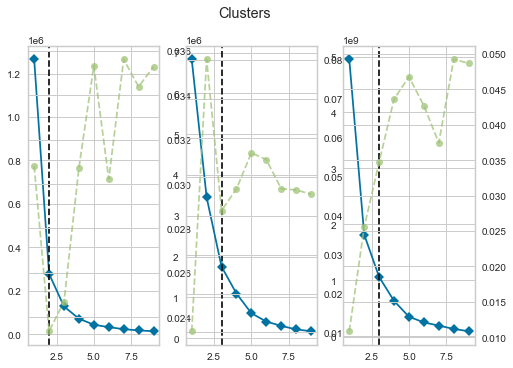

In [7]:
tools.rfmclusters(df_3m)

rfm clusters = 2, 3, 3

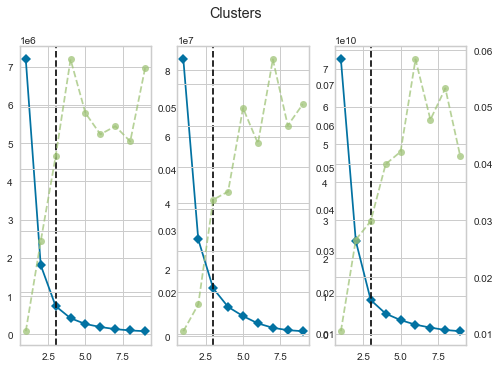

In [8]:
tools.rfmclusters(df_6m)

rfm clusters = 3, 3, 3

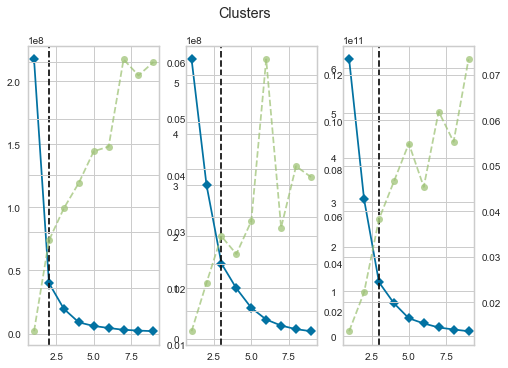

In [9]:
tools.rfmclusters(df_2y)

rfm clusters = 2, 3, 3

#### Cluster Analysis

In [10]:
df_3m = tools.clustering(df_3m, 3)
df_6m = tools.clustering(df_6m, 3)
df_2y = tools.clustering(df_2y, 3);

#### Scoring

In [11]:
df_3m = tools.score(df_3m)
df_6m = tools.score(df_6m)
df_2y = tools.score(df_2y);

#### Segmentation Based on Score

In [12]:
df_3m = tools.segmentation(df_3m)
df_6m = tools.segmentation(df_6m)
df_2y = tools.segmentation(df_2y);

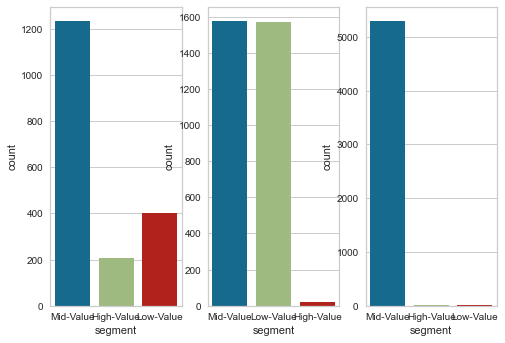

In [16]:
fig, ax = plt.subplots(1,3)
sns.countplot(x='segment', data=df_3m, ax=ax[0])
sns.countplot(x='segment', data=df_6m, ax=ax[1])
sns.countplot(x='segment', data=df_2y, ax=ax[2]);

In [17]:
df_3m.head()

customer id  recency  frequency  monetary  r_cluster  f_cluster  m_cluster  \
0      14620.0       12         30    393.28          2          0          0   
1      14740.0        4         89   1448.21          2          2          0   
2      13880.0       25         38    718.63          2          0          0   
3      16462.0       91          1     34.00          1          0          0   
4      17068.0       11         76   1480.95          2          2          0   

   score     segment  
0      2   Mid-Value  
1      4  High-Value  
2      2   Mid-Value  
3      1   Mid-Value  
4      4  High-Value

In [18]:
df_6m.head()

customer id  recency  frequency  monetary  r_cluster  f_cluster  m_cluster  \
0      15643.0      170         13    310.30          1          0          0   
1      14842.0       26        155   2441.80          0          0          0   
2      15124.0       13         15    184.19          0          0          0   
3      16422.0        8        194  16756.31          0          2          2   
4      15240.0       35         56   1077.47          0          0          0   

   score     segment  
0      1   Mid-Value  
1      0   Low-Value  
2      0   Low-Value  
3      4  High-Value  
4      0   Low-Value

### CLV Part

There is no cost specified in the dataset. That’s why Monetary becomes our CLTV directly.

In [20]:
print(df_3m.shape[0], df_6m.shape[0])

1840 3167


In [21]:
df_merge = pd.merge(df_3m, df_6m, how='left').fillna(0)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
corr = df_merge.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/xv/v29gqxhs4b5gth_lvdz9tgl80000gn/T/ipykernel_7416/850881349.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
